In [1]:
# importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import silhouette_score, silhouette_samples, confusion_matrix , accuracy_score, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the text file
df_data = pd.read_csv('Qualitative_Bankruptcy.data.txt', header=None, names=['Industrial Risk','Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk', 'Class'])

In [3]:
df_data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
df_data_trg = df_data.copy()

In [5]:
# checking the shape of the dataset
df_data.shape

(250, 7)

In [6]:
# checking the info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [7]:
# checking the dataset for null values
df_data.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [8]:
# checking the distinct values in each independent feature
for feature in df_data.drop('Class', axis =1):
    print('Unique values for', feature, '-', df_data[feature].unique())
    print(df_data[feature].value_counts())
    print("\n")

Unique values for Industrial Risk - ['P' 'N' 'A']
N    89
A    81
P    80
Name: Industrial Risk, dtype: int64


Unique values for Management Risk - ['P' 'N' 'A']
N    119
A     69
P     62
Name: Management Risk, dtype: int64


Unique values for Financial Flexibility - ['A' 'P' 'N']
N    119
A     74
P     57
Name: Financial Flexibility, dtype: int64


Unique values for Credibility - ['A' 'P' 'N']
N    94
P    79
A    77
Name: Credibility, dtype: int64


Unique values for Competitiveness - ['A' 'P' 'N']
N    103
P     91
A     56
Name: Competitiveness, dtype: int64


Unique values for Operating Risk - ['P' 'N' 'A']
N    114
P     79
A     57
Name: Operating Risk, dtype: int64




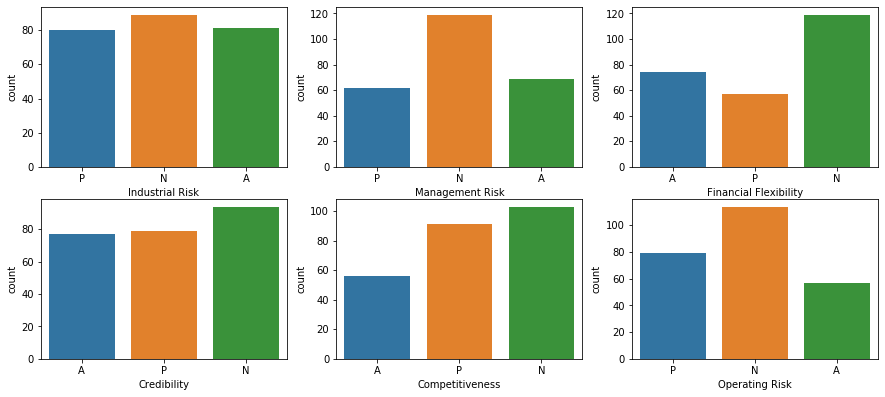

In [9]:
# visualizing the independent features
plt.figure(figsize=(15,10))

#Industrial Risk
plt.subplot(3,3,1)
sns.countplot(df_data['Industrial Risk'])

#Management Risk
plt.subplot(3,3,2)
sns.countplot(df_data['Management Risk'])

#Financial Flexibility
plt.subplot(3,3,3)
sns.countplot(df_data['Financial Flexibility'])

#Credibility
plt.subplot(3,3,4)
sns.countplot(df_data['Credibility'])

#Competitiveness
plt.subplot(3,3,5)
sns.countplot(df_data['Competitiveness'])

#Operating Risk
plt.subplot(3,3,6)
sns.countplot(df_data['Operating Risk'])

plt.show()

Statistical testing relationship between the independent features 

H0 : There is no relationship between the features

Ha : There is realationship between the features

if level of significance(p) < 0.05 we reject the null hypothesis H0 

In [58]:
# function to get the relationship of the independent features with each other
def Check_Independent_feature_relationship(data):
    for feature in data:
        for sec_feature in data:
            if((feature != sec_feature)):
                cross_ind_risk = pd.crosstab(data[sec_feature], data[feature]) 
                chi_data, p , s, r = stats.chi2_contingency(cross_ind_risk)
                if((p < 0.05)):
                    print(feature, "<->", sec_feature)
                    print('p-value :', p)
                    print()


In [59]:
# checking independent feature with each other to statistically prove that they are having a good relationship
Check_Independent_feature_relationship(df_data.drop('Class', axis=1))

Industrial Risk <-> Management Risk
p-value : 2.1012510084321396e-09

Industrial Risk <-> Competitiveness
p-value : 0.0003575530193327008

Industrial Risk <-> Operating Risk
p-value : 0.0003771481154645862

Management Risk <-> Industrial Risk
p-value : 2.1012510084321545e-09

Management Risk <-> Financial Flexibility
p-value : 0.00023078252706102613

Management Risk <-> Credibility
p-value : 1.5333488886415346e-05

Management Risk <-> Competitiveness
p-value : 2.7052075598063043e-07

Management Risk <-> Operating Risk
p-value : 1.1897511772752368e-05

Financial Flexibility <-> Management Risk
p-value : 0.00023078252706102613

Financial Flexibility <-> Credibility
p-value : 5.938647613813407e-22

Financial Flexibility <-> Competitiveness
p-value : 1.062155440186545e-34

Credibility <-> Management Risk
p-value : 1.5333488886415404e-05

Credibility <-> Financial Flexibility
p-value : 5.938647613813407e-22

Credibility <-> Competitiveness
p-value : 2.9375805986081766e-30

Credibility <-> O

In [60]:
# checking the target values
df_data['Class'].value_counts()

0    143
1    107
Name: Class, dtype: int64

In [61]:
## Industrial Risk has almost has the balanced class( N, A and P deciding factors count are almost equal)
## Management Risk, Financial Flexibility, Credibility, Competitiveness and Operating Risk seems to be imbalanced, having more of 'N' factors

## Checking the retionship between the Independent features
# -> Industrial Risk has a good relationship with Management Risk, Competitiveness and Operating Risk
# -> Management Risk has a good relationship with all the other independent fetures
# -> Financial Flexibility has a good relationship Management Risk,Credibility and Competitiveness
# -> Credibility has a good relationship with Management Risk, Financial Flexibility, Competitiveness and Operating Risk
# -> Competitiveness has a good relationship with all the other independent fetures
# -> Operating Risk has a good relationship with all the other independent fetures except Financial Flexibility

## Target feature Class seems to be imbalanced with 143 datapoints for NB and 107 datapoints for B.

Manual encoding

In [62]:
# encoding through label encoder
#for feature in df_data:
#    le = LabelEncoder()
#    df_data[feature] = df_data[feature].astype('category')    
#    df_data[feature] = le.fit_transform(df_data[feature]) 

In [63]:
# function to perform the manual encoding
def ManualEncoding(data):
    for feature in data:
        for ind in data.index:
            if data[feature][ind] == 'A':
                data[feature][ind] = 1
            if data[feature][ind] == 'N':
                data[feature][ind] = 0
            if data[feature][ind] == 'P':
                data[feature][ind] = 2 
            if data[feature][ind] == 'NB':
                data[feature][ind] = 0
            if data[feature][ind] == 'B':
                data[feature][ind] = 1
#        #df_data[feature] = df_data[feature].astype('category') 

In [64]:
# manual encoding the dataset
ManualEncoding(df_data)

In [65]:
# encoding implemented through dictionary
#manual_encoding = {"Industrial Risk": {"N": 0, "A": 1, "P": 2},
#                 "Management Risk": {"N": 0, "A": 1, "P": 2},
#                 "Financial Flexibility": {"N": 0, "A": 1, "P": 2},
#                 "Credibility": {"N": 0, "A": 1, "P": 2},
#                 "Competitiveness": {"N": 0, "A": 1, "P": 2},
#                 "Operating Risk": {"N": 0, "A": 1, "P": 2}, 
#                 "Class": {"NB": 0, "B": 1}}


In [66]:
#df_data.replace(manual_encoding, inplace=True)

In [67]:
df_data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,1,1,1,2,0
1,0,0,1,1,1,0,0
2,1,1,1,1,1,1,0
3,2,2,2,2,2,2,0
4,0,0,2,2,2,0,0


In [68]:
# splitting into target and independent variables
df_data_ind = df_data.drop('Class', axis=1)
df_data_targ = df_data['Class']

Checking the distribution of target and independent columns

Class             B  NB
Industrial Risk        
A                28  53
N                53  36
P                26  54


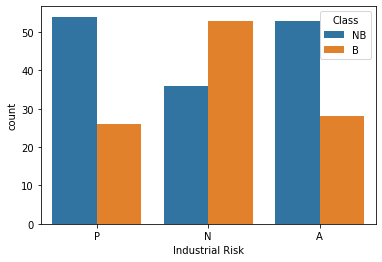

p-value = 0.00035105555200737033


In [69]:
# Industrial risk vs Class

cross_ind_risk = pd.crosstab(df_data_trg['Industrial Risk'], df_data_trg['Class'])
print(cross_ind_risk)

sns.countplot(df_data_trg['Industrial Risk'], hue=df_data_trg['Class'])
plt.show()

chi_data, p , s, r = stats.chi2_contingency(cross_ind_risk)
print('p-value =', p)

In [70]:
# From the plot the class seems to be almost balanced for A P and N.
# It can be inferred from the graph that more the positive Industrial Risk, the probability of NB is more.
# likewise more the negative risk more is the probability of B.
# and more average risk show more NB

Class             B  NB
Management Risk        
A                23  46
N                73  46
P                11  51


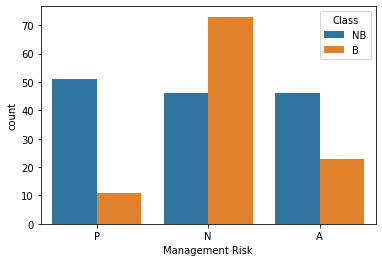

p-value = 2.3366640799655196e-08


In [71]:
# Management Risk vs Class

cross_mng_class = pd.crosstab(df_data_trg['Management Risk'], df_data_trg['Class'])
print(cross_mng_class)

sns.countplot(df_data_trg['Management Risk'], hue=df_data_trg['Class'])
plt.show()

chi_data, p , s, r = stats.chi2_contingency(cross_mng_class)
print('p-value =', p)

In [72]:
# From the plot the class seems to be imbalanced for A P and N.
# Looking at the countplot, more the positive mangement risk then it shows the trend to be NB
# and more the negative management risk more is the probability of B.
# more the average management risk it gives the inference for NB

Class                    B  NB
Financial Flexibility         
A                        4  70
N                      102  17
P                        1  56


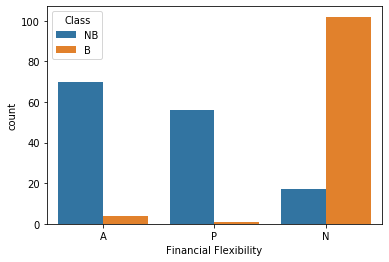

p-value = 7.334022479874038e-38


In [73]:
# Financial Flexibility vs Class

cross_fnc_class = pd.crosstab(df_data_trg['Financial Flexibility'], df_data_trg['Class'])
print (cross_fnc_class)

sns.countplot(df_data_trg['Financial Flexibility'], hue=df_data_trg['Class'])
plt.show()

chi_data, p , s, r = stats.chi2_contingency(cross_fnc_class)
print('p-value =', p)

In [74]:
# for this feature also the class seems to be imbalanced for A P and N.
# Looking at the countplot, more the positive Financial Flexibility risk then it show the trend to be NB. 
# and more the negative risk more is the probability of B. Only 16% represents the NB for the Financial Flexibility risk.
# more the average risk more is the inference for NB

Class              B  NB
Competitiveness         
A                  4  52
N                103   0
P                  0  91


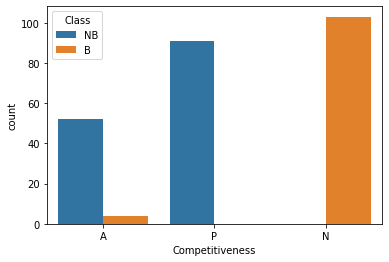

p-value = 1.017869598909574e-51


In [75]:
# Competitiveness vs Class

cross_comp_class = pd.crosstab(df_data_trg['Competitiveness'], df_data_trg['Class'])
print(cross_comp_class)

sns.countplot(df_data_trg['Competitiveness'], hue=df_data_trg['Class'])
plt.show()

chi_data, p , s, r = stats.chi2_contingency(cross_comp_class)
print('p-value =', p)

In [76]:
# The class seems to be imbalanced for A P and N.
# Looking at the countplot, there is only positive Competitiveness risk and infers NB. 
# and shows for negative competitiveness risk the higher probability for B. 
# more the average risk more is the inference for NB.

Class         B  NB
Credibility        
A            17  60
N            87   7
P             3  76


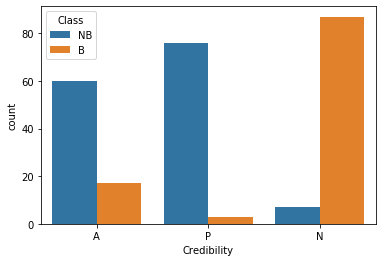

p-value = 5.877823993543991e-35


In [77]:
cross_cred_class = pd.crosstab(df_data_trg['Credibility'], df_data_trg['Class'])
print(cross_cred_class)

sns.countplot(df_data_trg['Credibility'], hue=df_data_trg['Class'])
plt.show()

chi_data, p , s, r = stats.chi2_contingency(cross_cred_class)
print('p-value =', p)

In [78]:
# The class seems to be imbalanced for A P and N.
# Looking at the countplot, more the positive Credibility risk and infers NB. 
# and shows for negative Credibility risk higher probability for B. 
# more the average Credibility risk more is the inference for NB.

Class            B  NB
Operating Risk        
A               24  33
N               64  50
P               19  60


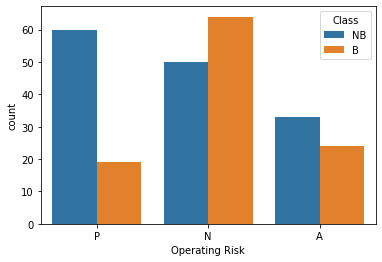

p-value = 5.429569801610118e-05


In [79]:
# Operating Risk vs Class

cross_opert_class = pd.crosstab(df_data_trg['Operating Risk'], df_data_trg['Class'])
print(cross_opert_class)

sns.countplot(df_data_trg['Operating Risk'], hue=df_data_trg['Class'])
plt.show()

chi_data, p , s, r = stats.chi2_contingency(cross_opert_class)
print('p-value =', p)

In [80]:
# The class seems to be imbalanced for A P and N.
# More the positive Operating Risk and infers NB. 
# and more the negative risk and infers B. 
# more the average risk more is the inference for NB.

In [81]:
# Checking the optimal value of k with the elbow method
wss =[] 
k_range = range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k,n_init = 10, random_state=6)
    model.fit(df_data_ind)
    wss.append(model.inertia_)
    print('The WSS for k means =',k,'is' , model.inertia_)

The WSS for k means = 1 is 1050.9279999999999
The WSS for k means = 2 is 655.5659885237351
The WSS for k means = 3 is 547.1791052058702
The WSS for k means = 4 is 492.64773046713515
The WSS for k means = 5 is 434.1527788877951
The WSS for k means = 6 is 398.36285674386363
The WSS for k means = 7 is 369.41199578949016
The WSS for k means = 8 is 328.29501929338886
The WSS for k means = 9 is 307.06778456894557


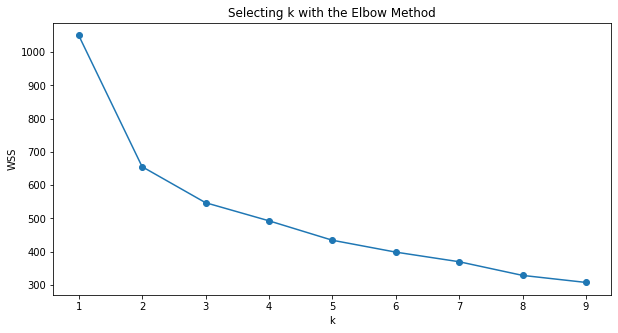

In [82]:
# plotting the WSS with the k to find the optimal k
plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.plot(k_range, wss, marker = "o" )
plt.show()

In [83]:
## k at 2 looks to be optimal

In [84]:
# finding the distance matrix
Z = linkage(df_data_ind, 'ward')
c, cop_dist = cophenet(Z, pdist(df_data_ind))

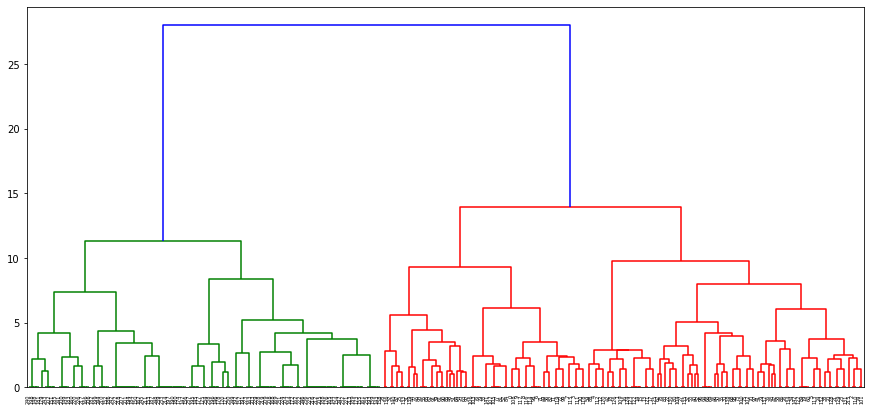

In [85]:
# dendrogram to visually check the number of clusters 
plt.figure(figsize=(15, 7)) 
dendrogram(Z)
plt.show()

In [86]:
# from the dendrogram k at 2 looks to be optimal.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3446100520145501
For n_clusters = 3 The average silhouette_score is : 0.29613292157554566


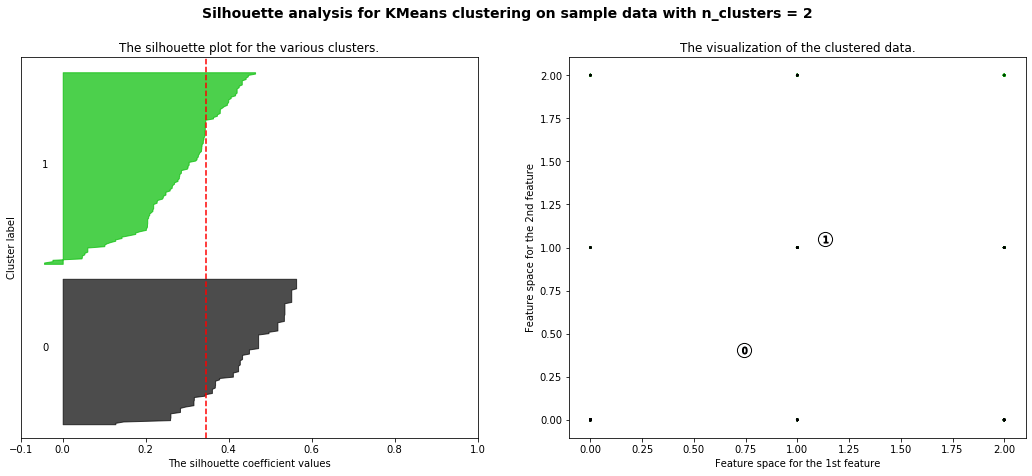

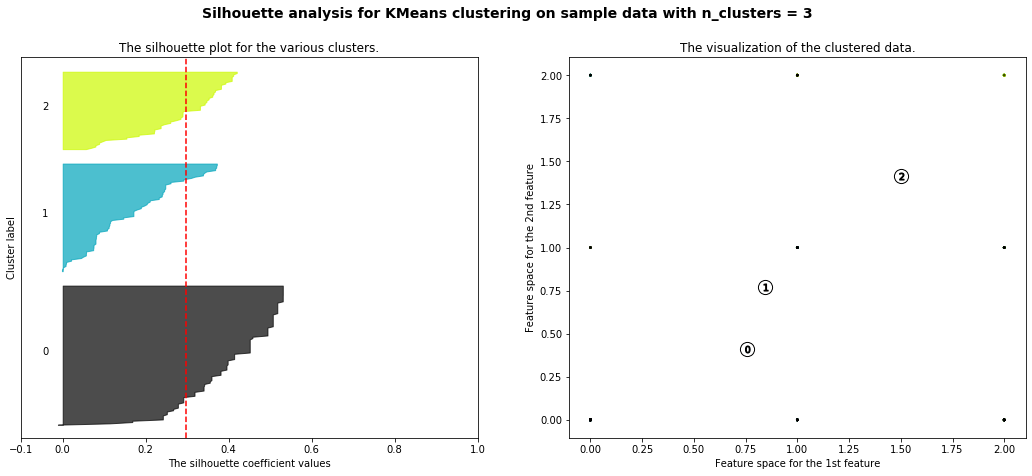

In [87]:
from sklearn.datasets import make_blobs
import matplotlib.cm as cm

print(__doc__)

range_n_clusters = [2,3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_data_ind) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_data_ind)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_data_ind, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_data_ind, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_data_ind.iloc[:, 0], df_data_ind.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [88]:
## with clusters 2 and 3 the silhouette_score difference is marginal.
## with the clusters of 3 from the plt could observe that the many datapoints assigned to one cluster seems to be lying inside the boundary of adjacent cluster.
## cluster of 2 seems to be optimal.

In [89]:
model_Kmeans =KMeans(n_clusters=2, random_state=7)

In [90]:
model_Kmeans.fit(df_data_ind)
print('The WSS for k means = 2 is' , model_Kmeans.inertia_)
predict = model_Kmeans.predict(df_data_ind)
predict

The WSS for k means = 2 is 655.5659885237351


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [91]:
# framing dataframe for the labels
df_data_ind['labels'] = model_Kmeans.labels_
df_data_ind['labels'] = df_data_ind['labels'].astype('category')
df_data_ind.sample(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,labels
241,0,0,0,0,0,2,1
67,2,1,0,1,2,0,0
130,1,1,1,1,2,1,0
128,1,1,2,1,1,1,0
155,1,0,0,0,0,0,1
68,2,2,2,1,2,0,0
18,0,0,2,1,2,0,0
243,0,0,0,1,0,2,1
61,1,1,1,2,2,2,0
153,0,0,1,0,0,0,1


In [92]:
df_data_ind.groupby(['labels']).count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
labels,,,,,,
0,142,142,142,142,142,142
1,108,108,108,108,108,108


In [93]:
X = df_data_ind.drop('labels', axis=1)
y = df_data_ind['labels']

In [94]:
# spitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [95]:
svc_model = SVC(C= 10, kernel='linear', gamma= 1, random_state=7)
svc_model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
scores = cross_val_score(svc_model, X_train, y_train, cv=4, scoring='accuracy')
np.mean(scores)

0.9659090909090909

In [97]:
prediction = svc_model.predict(X_test)

In [98]:
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, prediction), columns = ['Predict NB', ' Predict B'], index = ['Actual NB', 'Actual B'])
print("Confusion matrix: \n", cnf_matrix)
print("\n Classification report: \n", classification_report(y_test, prediction))
print("\n Accuracy score:", accuracy_score(y_test, prediction))

Confusion matrix: 
            Predict NB   Predict B
Actual NB          40           0
Actual B            0          35

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


 Accuracy score: 1.0


In [99]:
#1. Model has the accuracy score of 100%
#2. Model is able to predict Non-Bankruptcy and Bankruptcy to 100%
#3. Model is able to detect Non-Bankruptcy and Bankruptcy to 100%

In [100]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid', '']}  

In [101]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [102]:
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.743, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.743, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.829, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.829, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.914, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.971, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.943, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.971, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel= .......................................
[CV] ............. C=0.1, gamma=0.1, kernel=, score=nan, total=   0.0s
[CV] 

[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.600, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=0.1, gamma=0.0001, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=0.1, gamma=0.0001, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=0.1, gamma=0.0001, kernel=sigmoid, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV] .

[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.571, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.571, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.571, total=   0.0s
[CV] C=1, gamma=0.001, kernel= .......................................
[CV] .

[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.971, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.943, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.971, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1, kernel= ........................................
[CV] .............. C=10, gamma=0.1, kernel=, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel= ........................................
[CV] .............. C=10, gamma=0.1, kernel=, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel= ........................................
[CV] .

[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.371, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.371, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.257, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.257, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.171, total=   0.0s
[CV] C

[CV] .... C=100, gamma=0.0001, kernel=poly, score=0.571, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] .... C=100, gamma=0.0001, kernel=poly, score=0.571, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.971, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.971, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel= ....................................
[CV] .

[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.600, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.600, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', '']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [103]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [104]:
svc_model = SVC(C=10, gamma=1, kernel='rbf', random_state=7)
svc_model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [105]:
prediction = svc_model.predict(X_test)

In [106]:
scores = cross_val_score(svc_model, X_train, y_train, cv=4, scoring='accuracy')
np.mean(scores)

1.0

In [107]:
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, prediction), columns = ['Predict NB', ' Predict B'], index = ['Actual NB', 'Actual B'])
print("Confusion matrix: \n", cnf_matrix)
print("\n Classification report: \n", classification_report(y_test, prediction))
print("\n Accuracy score:", accuracy_score(y_test, prediction))

Confusion matrix: 
            Predict NB   Predict B
Actual NB          40           0
Actual B            1          34

 Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.97      0.99        35

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75


 Accuracy score: 0.9866666666666667


In [108]:
#1. Model has the accuracy score of 98.67%
#2. Model is able to predict Non-Bankruptcy to 98% and to Bankruptcy to 100%
#3. Model is able to detect Non-Bankruptcy to 100% and to Bankruptcy 97%. This may be due to the imbalance in the class.